In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
import keras
from sklearn.metrics import accuracy_score
import jieba.posseg as pseg
import matplotlib.pyplot as plt
import keras.preprocessing.text as T
from keras.preprocessing.text import Tokenizer
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

In [ ]:
df = pd.read_excel('機器學習.xlsx')
print(df.shape)
df[:5]

(597, 2)


,句子,情緒
0,快道歉！,0
1,你為什麼失職無能啊？,0
2,煩！怒！,0
3,還好意思在這裡發這種炫耀文,0
4,15萬劑有屁用！還要再死多少人？超前部署在哪裡？？,0


In [ ]:
a = df['句子'].str.len()
b = df.index[(a == 1)].tolist()
for i in b:
  print(df.loc[i,['句子']])

df = df.drop(index=[130,141,191,241,290])
df.shape

句子    幹
Name: 130, dtype: object
句子    幹
Name: 141, dtype: object
句子    幹
Name: 191, dtype: object
句子    幹
Name: 241, dtype: object
句子    幹
Name: 290, dtype: object
句子    耶
Name: 534, dtype: object


(592, 2)

In [ ]:
def cut(text):
    words = pseg.cut(text)
    return ' '.join([word for word, flag in words if flag != 'x'   ])

def cut1(text):
    words = pseg.cut(text)
    return ' '.join([flag for word, flag in words if flag != 'x'  ])

In [ ]:
df['cut'] = df.loc[:, '句子'].apply(cut)
df['say'] = df.loc[:, '句子'].apply(cut1)

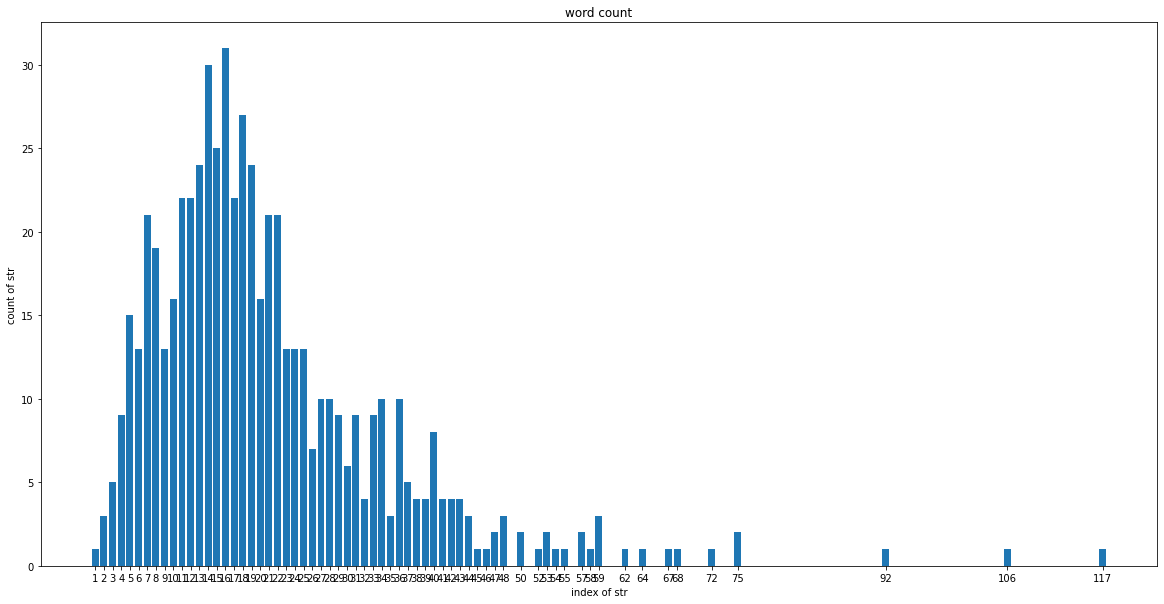

In [ ]:
plt.figure(figsize=(20, 10)) # 讓你的圖畫起來可以大大der
cc = df["cut"].str.len().value_counts()
c_index = cc.index
plt.bar(c_index,cc)
plt.xticks(c_index)
plt.xlabel('index of str')
plt.ylabel('count of str')
plt.title('word count')
plt.show()

In [ ]:
label = Tokenizer(100000)
print(type(df['cut']))
df_t = pd.concat([df.cut,ds],ignore_index=True)
print(df_t)
label.fit_on_texts(df_t)
df['to_n'] = label.texts_to_sequences(df_t[:592])
max = df['to_n'].apply(len).max()
max

label.fit_on_texts(df['say'])
df['w_to_n'] = label.texts_to_sequences(df['say'])
max1 = df['w_to_n'].apply(len).max()
max1

<class 'pandas.core.series.Series'>
0                                   快 道歉
1                         你 為 什麼 失職 無能 啊
2                                    煩 怒
3                     好意思 在 這裡 發 這種 炫耀 文
4      15 萬劑 有 屁用 還要 再 死 多少 人 超前 部署 在 哪裡
                     ...                
590                         終於 要 放暑假 了 讚
591                         爽 吃 一 波麥 當 勞
592          笑 死 他 還 真的 自以 為 自己 很 受歡 迎 阿
593                         這個 市長 我 超 喜歡
594                這 部劇 超 喜歡 的 絕對 不能 退 追
Length: 595, dtype: object


47

In [ ]:
X = df['to_n']
Y = df['w_to_n']
X = keras.preprocessing.sequence.pad_sequences(X,max)
Y = keras.preprocessing.sequence.pad_sequences(Y,max1)
X = pd.DataFrame(X)
Y = pd.DataFrame(Y)
Y

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,12,4,1,1,16
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,99
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39,12,4,1,4,1,2
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,162,1,2,18,3,1,8,2,1,2,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,16,1,14,18,99
588,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,16,14,18,1,1,7
589,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30,1,7,8,17
590,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,39,7,15


In [ ]:
f_X = pd.concat([X,Y],axis=1) 
f_X = X

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(f_X, df['情緒'], test_size = 0.2, random_state=42)

In [ ]:
parameters = {'kernel':('rbf',), 'C':[1,2,3,4,5,6,7,8,9,10]}
svc = SVC()
svc_grid = GridSearchCV(svc, parameters)
svc_grid.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'kernel': ('rbf',)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
pd.DataFrame(svc_grid.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,0.011558,0.000222,0.003098,0.000088,3,rbf,"{'C': 3, 'kernel': 'rbf'}",0.705263,0.778947,0.800000,0.734043,0.840426,0.771736,0.047767,1
3,0.012815,0.001229,0.003345,0.000204,4,rbf,"{'C': 4, 'kernel': 'rbf'}",0.715789,0.757895,0.789474,0.744681,0.840426,0.769653,0.042579,2
9,0.012286,0.001828,0.002833,0.000070,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.726316,0.757895,0.747368,0.776596,0.808511,0.763337,0.027827,3
4,0.011925,0.000198,0.003241,0.000168,5,rbf,"{'C': 5, 'kernel': 'rbf'}",0.715789,0.757895,0.768421,0.744681,0.829787,0.763315,0.037630,4
5,0.012124,0.000406,0.003083,0.000274,6,rbf,"{'C': 6, 'kernel': 'rbf'}",0.715789,0.747368,0.778947,0.744681,0.829787,0.763315,0.038790,4
8,0.011295,0.000465,0.003231,0.000851,9,rbf,"{'C': 9, 'kernel': 'rbf'}",0.726316,0.768421,0.747368,0.765957,0.808511,0.763315,0.027199,4
7,0.011490,0.000230,0.002958,0.000115,8,rbf,"{'C': 8, 'kernel': 'rbf'}",0.726316,0.757895,0.757895,0.744681,0.808511,0.759059,0.027302,7
1,0.013059,0.001678,0.003320,0.000073,2,rbf,"{'C': 2, 'kernel': 'rbf'}",0.684211,0.768421,0.778947,0.734043,0.819149,0.756954,0.045387,8
6,0.012189,0.000678,0.003242,0.000346,7,rbf,"{'C': 7, 'kernel': 'rbf'}",0.715789,0.757895,0.747368,0.744681,0.808511,0.754849,0.030245,9
0,0.012753,0.000308,0.003623,0.000309,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.673684,0.768421,0.757895,0.691489,0.787234,0.735745,0.044765,10


In [ ]:
best_svc_clf = SVC(C=3, kernel='rbf').fit(X_train, y_train)

print(best_svc_clf)
y_pred = best_svc_clf.predict(X_test)
print('svc acc:', accuracy_score(y_test, y_pred))

SVC(C=3, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
svc acc: 0.8403361344537815


In [ ]:
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(confusion_matrix, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig, ax = plt.subplots(figsize=(20, 10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.show()

Confusion matrix, without normalization


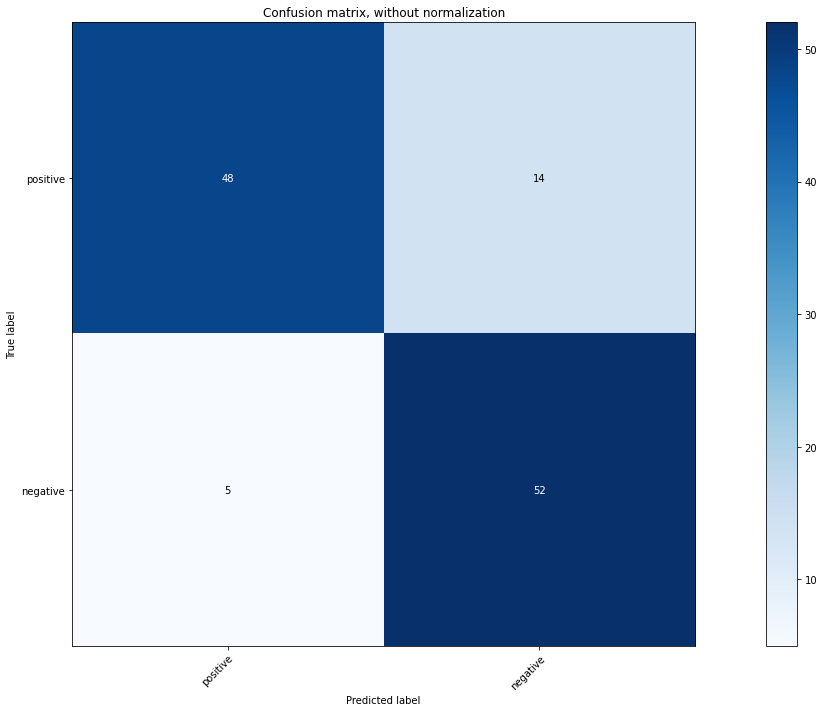

In [ ]:
classes=['positive','negative']
cnf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cnf_matrix,classes)